In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.special import inv_boxcox

In [4]:
np.random.seed(0)
sales_data = np.random.exponential(scale=100, size=1000)

In [5]:
df = pd.DataFrame(sales_data, columns=['sales'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [7]:
df.head()

,sales
0,79.587451
1,125.593076
2,92.322315
3,78.720115
4,55.104849


In [8]:
df.describe()

,sales
count,1000.000000
mean,100.354021
std,102.960877
min,0.054611
25%,28.450508
50%,65.647606
75%,133.659157
max,856.103075


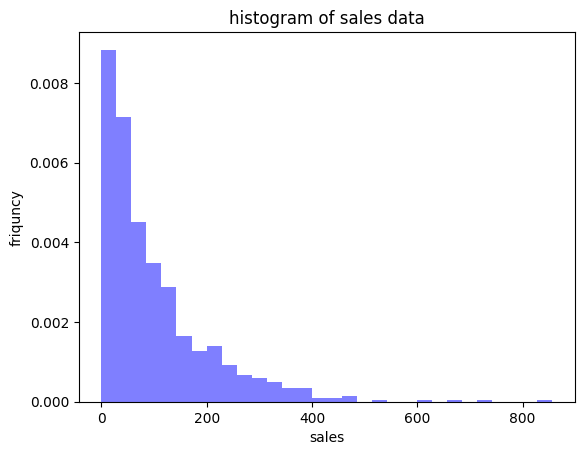

In [9]:
plt.Figure(figsize=(8,6))
plt.hist(df['sales'],bins = 30, density=True, alpha=0.5,color='blue')
plt.title ('histogram of sales data')
plt.xlabel('sales')
plt.ylabel('friquncy')
plt.show()

In [10]:
df['sales'],lam =stats.boxcox(df['sales'])

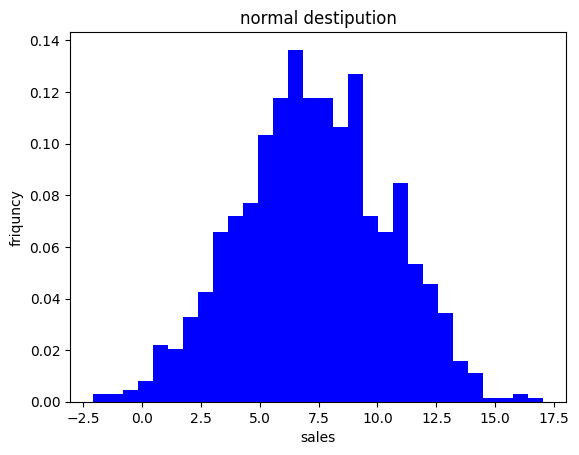

In [11]:
plt.Figure(figsize=(8,6))
plt.hist(df['sales'],bins= 30,density=True,color='blue')
plt.title('normal destipution')
plt.xlabel('sales')
plt.ylabel('friquncy')
plt.show()

In [12]:
df['orignal_sales']=inv_boxcox(df['sales'],lam)

In [13]:
df.head()

,sales,orignal_sales
0,7.785638,79.587451
1,9.176777,125.593076
2,8.221525,92.322315
3,7.754076,78.720115
4,6.771141,55.104849


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
df['sales'] = scaler.fit_transform(df[['sales']])

In [17]:
from sklearn.preprocessing import PowerTransformer

In [18]:
power_transformer= PowerTransformer(method= 'yeo-johnson')

In [19]:
df['sales']= power_transformer.fit_transform(df[['sales']])

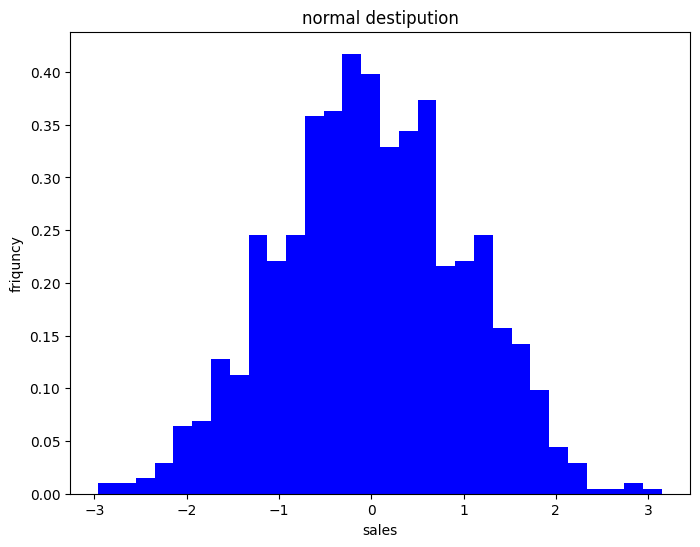

In [20]:
plt.figure(figsize=(8,6))
plt.hist(df['sales'],bins=30, density=True,color='blue')
plt.title('normal destipution')
plt.xlabel('sales')
plt.ylabel('friquncy')
plt.show()

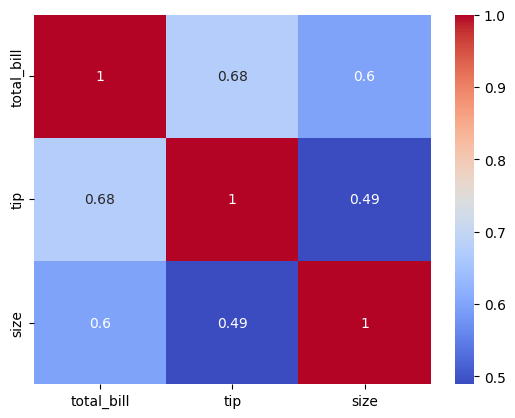

In [21]:
df = sns.load_dataset('tips')[['total_bill','tip','size']]
corr= df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [22]:
from scipy.stats import binom
n =10
p=0.2
k= 3
prob = binom.pmf(k,n,p)


In [23]:
print('bionomial probability:',prob)

bionomial probability: 0.20132659199999992


In [24]:
from scipy.stats import hypergeom

In [25]:
N = 100
K = 20
n = 5 
k= 2
prob = hypergeom.pmf(k,N,k,n)
print('hypergeom probability:', prob)

hypergeom probability: 0.00202020202020202


In [26]:
from scipy.stats import poisson

In [27]:
lam = 8
K = 10
prob = poisson.pmf(K,lam)
print('poisson:',prob)

poisson: 0.09926153383153544


In [28]:
from scipy.stats import norm

In [30]:
df_delivery = pd.DataFrame({
    "Delivery_Time": [12,14,15,13,16,15,14,13,12,14,
                      15,17,14,13,16,15,12,14,15,13,
                      16,14,13,15,16,14,12,13,15,14]
})


In [31]:
mean = df_delivery['Delivery_Time'].mean()

In [32]:
std = df_delivery['Delivery_Time'].std(ddof=0)

In [33]:
n = len(df_delivery)

In [34]:
confidence = 0.95
z_value = norm.ppf((1+ confidence)/2)
lower = mean -z_value *(std/np.sqrt(n))
upper = mean + z_value *(std / np.sqrt(n))
print('95% z-confidence interval',(lower,upper))

95% z-confidence interval (np.float64(13.655618869244423), np.float64(14.611047797422243))
